In [2]:
import os
import tensorflow
os.environ['KERAS_BACKEND'] = 'tensorflow'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # 3 = INFO, WARNING, and ERROR messages are not printed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
print("hello")

hello


In [3]:
from google.colab import drive
drive.mount('/content/drive')
from pathlib import Path
base = Path('/content/drive/MyDrive/ML/')

Mounted at /content/drive


In [4]:
folder = base/'data/'
zip_path = base/'data/train.zip'
!cp '{zip_path}' .
!unzip -q train.zip
!rm train.zip

In [5]:
dataset = pd.read_csv("/content/drive/MyDrive/ML/driver_imgs_list.csv")
dataset.head(5)

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [6]:
import os
from IPython.display import display, Image
import matplotlib.image as mpimg

activity_map = {'c0': 'Safe driving', 
                'c1': 'Texting - right', 
                'c2': 'Talking on the phone - right', 
                'c3': 'Texting - left', 
                'c4': 'Talking on the phone - left', 
                'c5': 'Operating the radio', 
                'c6': 'Drinking', 
                'c7': 'Reaching behind', 
                'c8': 'Hair and makeup', 
                'c9': 'Talking to passenger'}


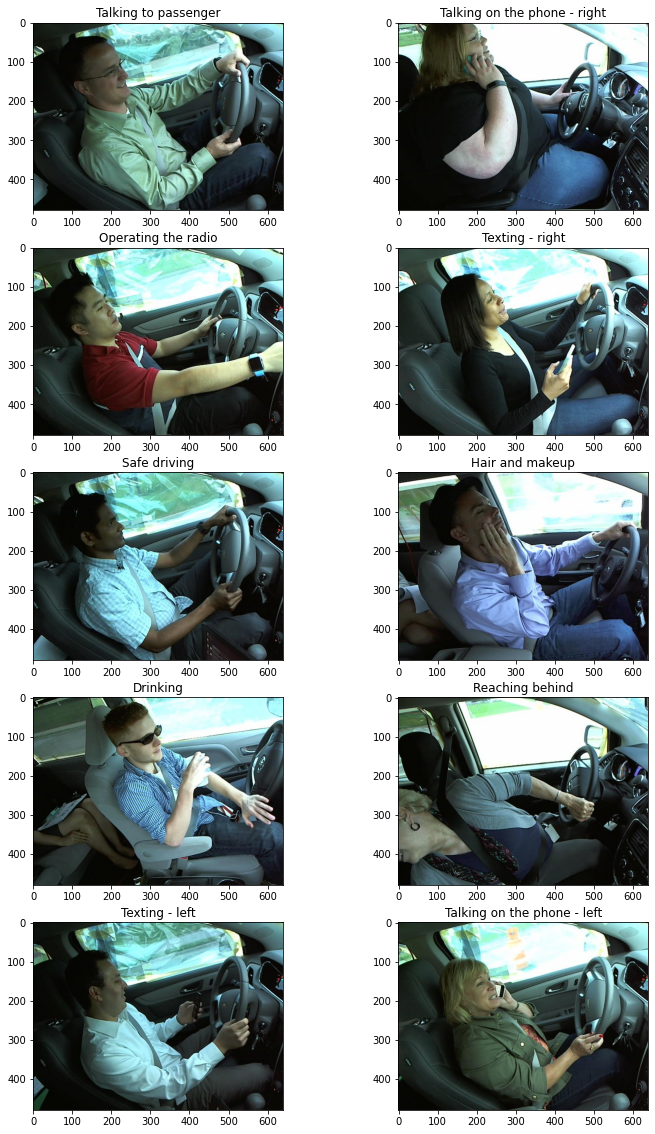

In [7]:
plt.figure(figsize = (12, 20))
image_count = 1
BASE_URL = "train/"
for directory in os.listdir(BASE_URL):
    if directory[0] != '.':
        for i, file in enumerate(os.listdir(BASE_URL + directory)):
            if i == 1:
                break
            else:
                fig = plt.subplot(5, 2, image_count)
                image_count += 1
                image = mpimg.imread(BASE_URL + directory + '/' + file)
                plt.imshow(image)
                plt.title(activity_map[directory])

In [9]:
classifier = Sequential()
classifier.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', input_shape = (240, 240, 3), data_format = 'channels_last'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units = 1024, activation = 'relu'))
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dense(units = 10, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 238, 238, 128)     3584      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 119, 119, 128)     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 117, 117, 64)      73792     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 58, 58, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)            

In [10]:
train_datagen = ImageDataGenerator(rescale = 1.0/255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True, 
                                   validation_split = 0.2)

training_set = train_datagen.flow_from_directory("train/", 
                                                 target_size = (240, 240), 
                                                 batch_size = 32,
                                                 subset = 'training')

validation_set = train_datagen.flow_from_directory("train/", 
                                                   target_size = (240, 240), 
                                                   batch_size = 32,
                                                   subset = 'validation')

Found 17946 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.


In [ ]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 17943/32,
                         epochs = 10,
                         validation_data = validation_set,
                         validation_steps = 4481/32)

Epoch 1/10
560/560 [==============================] - 3466s 6s/step - loss: 1.8417 - accuracy: 0.3266 - val_loss: 0.5425 - val_accuracy: 0.8206
Epoch 2/10
560/560 [==============================] - 3612s 6s/step - loss: 0.4047 - accuracy: 0.8697 - val_loss: 0.2315 - val_accuracy: 0.9272
Epoch 3/10
344/560 [=================>............] - ETA: 21:59 - loss: 0.2090 - accuracy: 0.9333